Processo de modelagem dos dados.

Veremos que, de forma geral, o processo consiste em:

- 0) Fazer todo o processo de limpeza e avaliação da base, EDA, etc., etc.


- 1) Importar a **classe do algoritmo que se deseja treinar**
    - Usaremos quase sempre a biblioteca [scikit-learn](https://scikit-learn.org/stable/)
    
  
- 2) Instanciar a classe do algoritmo, **escolhendo os hiperparâmetros desejados**
    - Para a primeira versão do modelo, pode ser uma boa escolha utilizar os parâmetros default;
    - Veremos mais pra frente como escolher os parâmetros adequadamente;
    
   
- 3) Separe os dados em **dados de treino** e **dados de teste**.
    - Em alguns casos, pode ser interessante criar também um conjunto de **dados de validação**
    - Para fazer a separação, usamos o [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    
    
- 4) Treine o modelo, usando **os dados de treino**


- 5) Use o modelo treinado para **fazer previsões** usando os **dados de teste** (ou **de validação**)


- 6) **Avalie a performance do modelo com base nas previsões acima**


- 7) Se necessário, reinicie o ciclo!


- 8) Quando o modelo estiver suficientemente bom, faça o **deploy**

Algumas análises para visualização dos dados e tratamento para iniciar os modelos.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import re
from seaborn.widgets import cubehelix_palette
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from xgboost import XGBClassifier
from mlxtend.plotting import plot_confusion_matrix


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.1 MB/s eta 0:00:00


In [6]:
pip install mlxtend


In [7]:
pip install xgboost

In [8]:
pip install lightgbm

In [9]:
#Paleta de cores escolhida
paleta = sns.cubehelix_palette()

In [10]:
#Importando dados feito o tratamento de nulos, inconsistência de dados, união das bases e mudança de nome.
bd_data_clean = '/content/drive/MyDrive/Santander Coders/6 - Marchine lerning/projeto_machine_learning/Credit_card_clean.cvs'

df = pd.read_csv(bd_data_clean)

In [11]:
df = df.drop(df.columns[10], axis=1) #retirando a coluna contar_aniverisario que escolhemos não utilizar

In [12]:
#Observando as primeiras linhas dos dados
df.head().T

,0,1,2,3,4
id,5008827,5009744,5009746,5009749,5009752
genero,M,F,F,F,F
carro,Y,Y,Y,Y,Y
bens_propriedade,Y,N,N,N,N
filhos,0,0,0,0,0
renda_anual,180000.0,315000.0,315000.0,172243.04,315000.0
tipo_renda,Pensionista,Associado Comercial,Associado Comercial,Associado Comercial,Associado Comercial
escolaridade,Ensino superior,Ensino superior,Ensino superior,Ensino superior,Ensino superior
estado_civil,Casado,Casado,Casado,Casado,Casado
estilo_vida,Casa/Apartamento,Casa/Apartamento,Casa/Apartamento,Casa/Apartamento,Casa/Apartamento


In [13]:
# Observando os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1541 non-null   int64  
 1   genero              1541 non-null   object 
 2   carro               1541 non-null   object 
 3   bens_propriedade    1541 non-null   object 
 4   filhos              1541 non-null   int64  
 5   renda_anual         1541 non-null   float64
 6   tipo_renda          1541 non-null   object 
 7   escolaridade        1541 non-null   object 
 8   estado_civil        1541 non-null   object 
 9   estilo_vida         1541 non-null   object 
 10  desempregado        1541 non-null   int64  
 11  celular             1541 non-null   int64  
 12  telefone_comercial  1541 non-null   int64  
 13  telefone            1541 non-null   int64  
 14  email_id            1541 non-null   int64  
 15  tipo_ocupação       1541 non-null   object 
 16  tamanh

In [14]:
# Algumas métricas estatísticas.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1541.0,5.078979e+06,41671.365842,5008827.0,5045113.0,5078924.0,5115671.0,5150412.0
filhos,1541.0,4.133679e-01,0.777811,0.0,0.0,0.0,1.0,14.0
renda_anual,1541.0,1.908141e+05,112153.974398,33750.0,121500.0,171000.0,225000.0,1575000.0
desempregado,1541.0,5.940589e+04,137847.216798,-14887.0,-3173.0,-1563.0,-431.0,365243.0
celular,1541.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
telefone_comercial,1541.0,2.083063e-01,0.406229,0.0,0.0,0.0,0.0,1.0
telefone,1541.0,3.082414e-01,0.461917,0.0,0.0,0.0,1.0,1.0
email_id,1541.0,9.214796e-02,0.289329,0.0,0.0,0.0,0.0,1.0
tamanho_familia,1541.0,2.162232e+00,0.948492,1.0,2.0,2.0,3.0,15.0
status,1541.0,1.103180e-01,0.313387,0.0,0.0,0.0,0.0,1.0


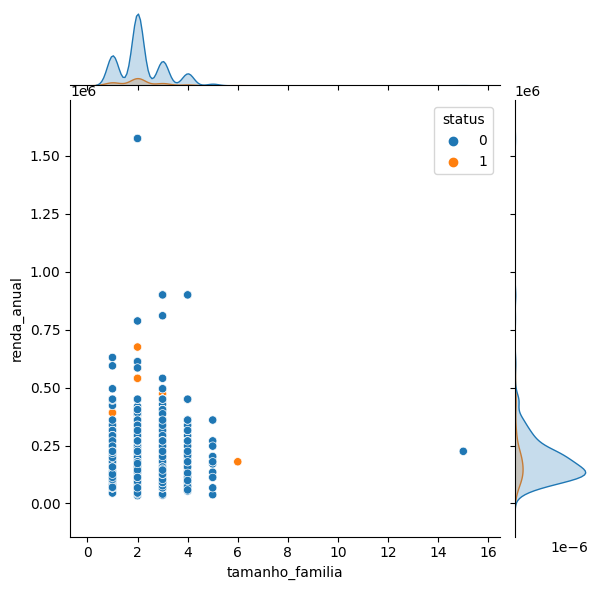

In [15]:
sns.jointplot(data=df, x='tamanho_familia', y='renda_anual', hue='status')

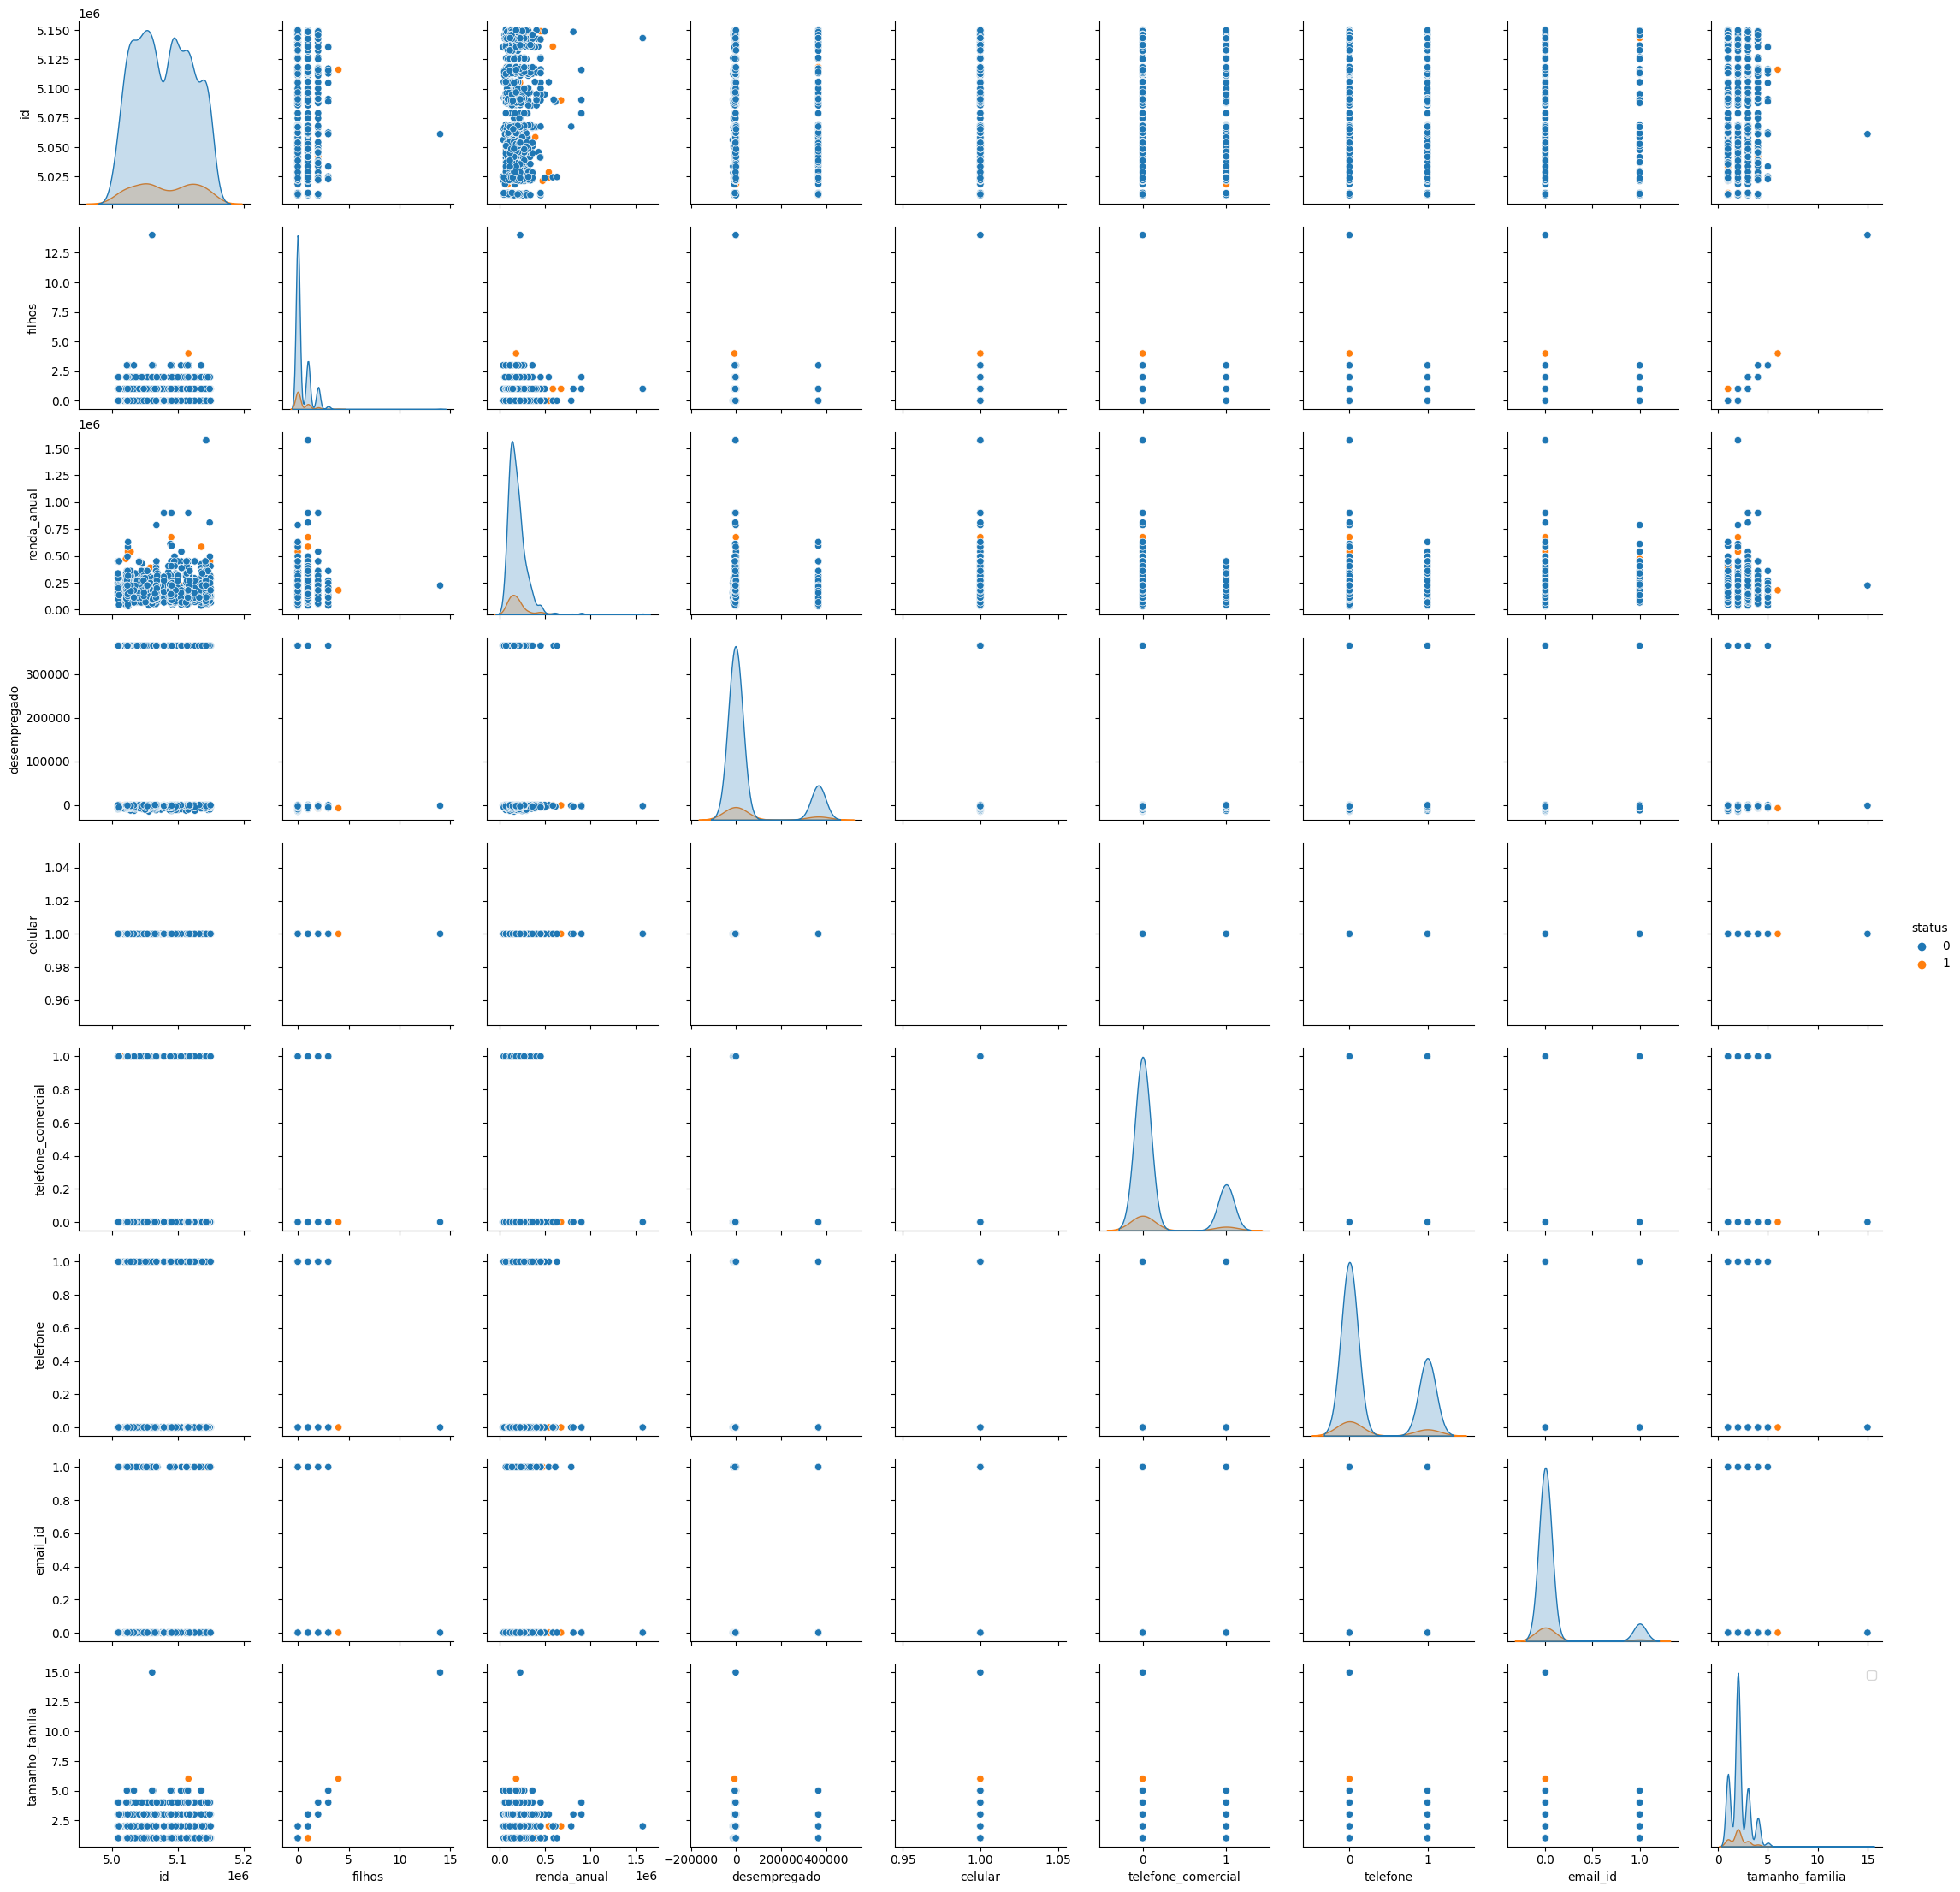

In [16]:
#Gráfico de matriz de dispersão (pair plot)
sns.pairplot(df, hue='status')
plt.legend()

# Transforme as colunas categóricas com Label e Dummie/One Hot Encoding

 Temos as seguintes colunas categóricas:

 genero                 
 carro               
 bens_propriedade     
 tipo_renda          
 escolaridade          
 estado_civil         
 estilo_vida         
 tipo_ocupação


 Escolhemos tratar as colunas genero, carro e bens_propriedade com Label e as colunas escolaridade, estado_civil, estilo_vida, tipo_ocupação, tipo_renda com Dummies.

 Nas colunas com tratamento tipo Dummies existiam varias opções dentro da mesma coluna e com esse tratamento dividiu as colunas contendo 0 para o caso de não condizer com a informação e 1 para o caso de condizer a informação.

 Nos tratamentos com Label foi trocada a informação para as seguintes informações:

 Y = 1
 N = 0
 M = 1
 F = 0


In [17]:
colunas_label_encoder = ['genero', 'carro', 'bens_propriedade'] #Lista de colunas que serão codificadas com LabelEncoder

df_tratado = df.copy() #Cópia do DataFrame original

label_encoder = LabelEncoder()

#Tratamento com Label Encoder
for coluna in colunas_label_encoder:
    df_tratado[coluna] = label_encoder.fit_transform(df_tratado[coluna])

 #Tratamento com Dummies/One Hot Encoding
df_tratado = pd.get_dummies(df_tratado, prefix_sep='_',columns=['tipo_renda',
                                                                'escolaridade',
                                                                'estado_civil',
                                                                'estilo_vida',
                                                                'tipo_ocupação'])
df_tratado.head().T

,0,1,2,3,4
id,5008827.0,5009744.0,5009746.0,5009749.00,5009752.0
genero,1.0,0.0,0.0,0.00,0.0
carro,1.0,1.0,1.0,1.00,1.0
bens_propriedade,1.0,0.0,0.0,0.00,0.0
filhos,0.0,0.0,0.0,0.00,0.0
renda_anual,180000.0,315000.0,315000.0,172243.04,315000.0
desempregado,365243.0,-586.0,-586.0,-586.00,-586.0
celular,1.0,1.0,1.0,1.00,1.0
telefone_comercial,0.0,1.0,1.0,1.00,1.0
telefone,0.0,1.0,1.0,1.00,1.0


In [18]:
# Remova a coluna status dos dados, extraindo as features na variável X
X = df_tratado.drop(['status'], axis = 1)
y_status = df['status']

In [19]:
#Separando em train e test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, # Conjunto de features
                                                    y_status, # Conjunto alvo
                                                    test_size=0.3, # Dividir o conjunto em x% para teste (se for float), x elementos para teste se inteiro
                                                    random_state=42, # Garantir a reprodutibilidade
                                                    stratify = y_status) # Garantir a estratificação balanceada (manter o desbalanceamento do dataset)

In [20]:
#confirmando o mantimento da proporcionalidade
print(f" Proporção y_status: \n{y_status.value_counts(normalize=True)}")
print(f" Proporção y_train: \n{y_train.value_counts(normalize=True)}")
print(f" Proporção y_test: \n{y_test.value_counts(normalize=True)}")

 Proporção y_status: 
0    0.889682
1    0.110318
Name: status, dtype: float64
 Proporção y_train: 
0    0.88961
1    0.11039
Name: status, dtype: float64
 Proporção y_test: 
0    0.889849
1    0.110151
Name: status, dtype: float64


In [21]:
# Padronização/Normalizando dos dados utilizando o StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train) #Normalização nos dados de treino

In [22]:
X_test_std = scaler.transform(X_test) #Normalização nos dados de teste

In [23]:
print('Dados de treino->', X_train.shape[0])
print('Dados de teste ->', X_test.shape[0])

Dados de treino-> 1078
Dados de teste -> 463


Analisando a performace dos dados nos seguintes modelos:
- Decision Tree
- Random Forest
- AdaBoost
- Gradient Boosting
- XGBoost
- LightGBM

Para analisar esses modelos iremos utilizar as seguintes metricas:
- Acurácia
- Precisão
- Recall
- F1-Score
- ROC-AUC

In [24]:
random_seed = 42 #garantir reprodutibilidade

#Lista de modelos utilizados
lista_modelos = [
  {
      "nome_do_modelo": "Decision Tree",
      "estimador": DecisionTreeClassifier(random_state=random_seed)
  },
  {
      "nome_do_modelo": "Random Forest",
      "estimador": RandomForestClassifier(random_state=random_seed)
  },
  {
      "nome_do_modelo": "AdaBoost",
      "estimador": AdaBoostClassifier(random_state=random_seed)
  },
  {
      "nome_do_modelo": "GradientBoosting",
      "estimador": GradientBoostingClassifier(random_state=random_seed)
  },
  {
      "nome_do_modelo": "XGBoost",
      "estimador": XGBClassifier(random_state=random_seed)
  },
  {
      "nome_do_modelo": "LightGBM",
      "estimador": lgb.LGBMClassifier(random_state=random_seed)
  },
]

Relatório de classificação para Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       412
           1       0.37      0.51      0.43        51

    accuracy                           0.85       463
   macro avg       0.65      0.70      0.67       463
weighted avg       0.87      0.85      0.86       463



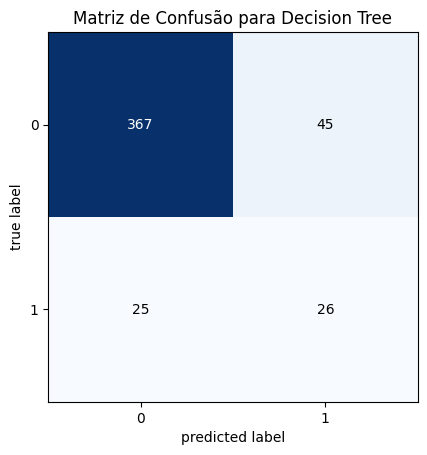

Relatório de classificação para Random Forest:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       412
           1       0.90      0.37      0.53        51

    accuracy                           0.93       463
   macro avg       0.92      0.68      0.74       463
weighted avg       0.93      0.93      0.91       463



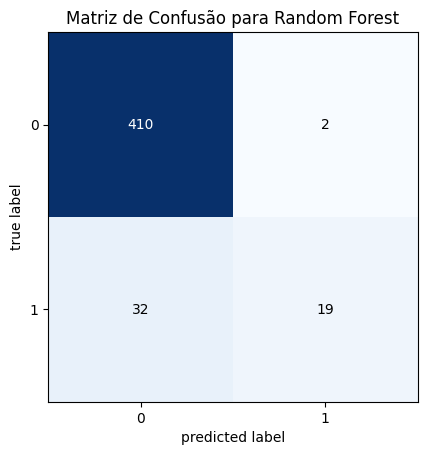

Relatório de classificação para AdaBoost:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       412
           1       0.67      0.08      0.14        51

    accuracy                           0.89       463
   macro avg       0.78      0.54      0.54       463
weighted avg       0.87      0.89      0.86       463



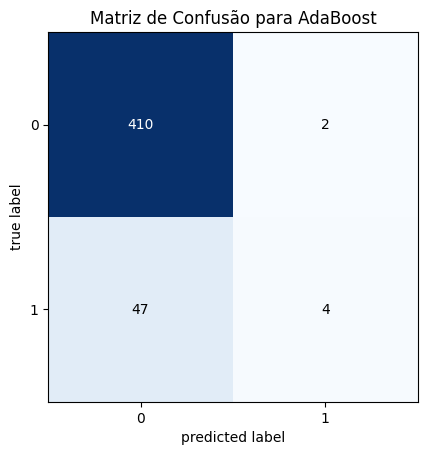

Relatório de classificação para GradientBoosting:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       412
           1       0.69      0.18      0.28        51

    accuracy                           0.90       463
   macro avg       0.80      0.58      0.61       463
weighted avg       0.88      0.90      0.87       463



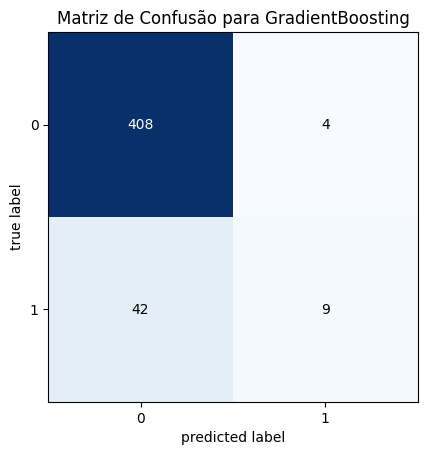

Relatório de classificação para XGBoost:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       412
           1       0.74      0.45      0.56        51

    accuracy                           0.92       463
   macro avg       0.84      0.72      0.76       463
weighted avg       0.91      0.92      0.91       463



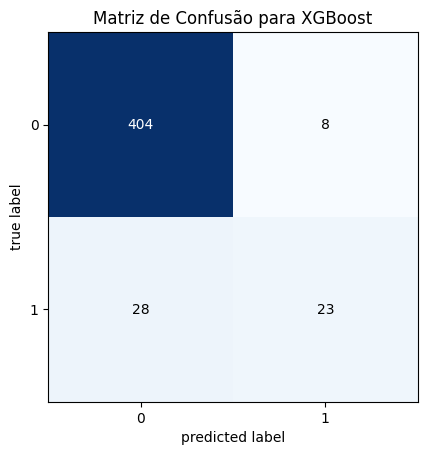

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 119, number of negative: 959
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 1078, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110390 -> initscore=-2.086768
[LightGBM] [Info] Start training from score -2.086768
Relatório de classificação para LightGBM:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       412
           1       0.85      0.45      0.59        51

    accuracy                           0.93       463
   macro avg       0.89      0.72      0.78       463
weighted avg       0.93      0.93      0.92       4

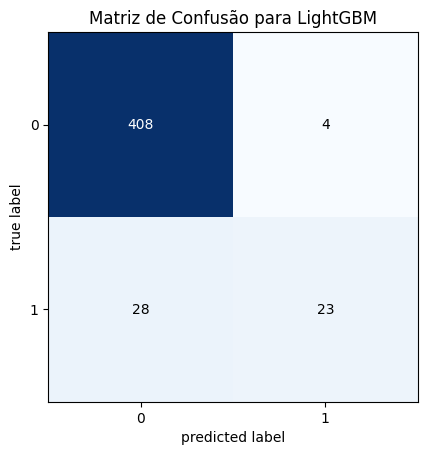

In [ ]:
#Fazendo os ajustes no modelo e informando o desempenho de cada modelo
#Utilizamos uma lista com todos os modelos que escolhemos treinar

for modelo_info in lista_modelos:
    nome_do_modelo = modelo_info["nome_do_modelo"]
    estimador = modelo_info["estimador"]

    estimador.fit(X_train, y_train)  # Ajuste do modelo aos dados de treinamento
    y_pred = estimador.predict(X_test)  # Previsões com o modelo

    report = classification_report(y_test, y_pred)
    print(f"Relatório de classificação para {nome_do_modelo}:\n{report}\n {'='*60}")

    # Calculando e plotando a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    plot_confusion_matrix(conf_mat=cm)
    plt.title(f"Matriz de Confusão para {nome_do_modelo}")
    plt.show()

In [40]:
'''
Essa função faz os ajustes nos modelos e informando o desempenho de cada modelo.
Utilizamos uma lista com todos os modelos que escolhemos treinar e analisar.
Essa função também plota a Matriz de confusão para cada modelo e a curva ROC-AUC
'''
def treinamento_vizualizacao_modelos(
        lista_modelos,
        X_train,
        X_test,
        y_train,
        y_test):

    print(f"\n **** RESULTADO DOS MODELOS ****\n\n")
    response = {}
    for mdl in lista_modelos:
        nome_do_modelo = mdl["nome_do_modelo"]
        model = mdl.get('estimador')

        #Treinando os modelos
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)


        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

        model_name = mdl.get('nome_do_modelo')
        accuracy = metrics.accuracy_score(y_test, y_predict)
        auc = metrics.roc_auc_score(y_test, model.predict(X_test))
        precision = metrics.precision_score(y_test, y_predict, average='weighted')
        recall = metrics.recall_score(y_test, y_predict, average='weighted')
        f1_score = metrics.f1_score(y_test, y_predict, average='weighted')
        plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (mdl.get('nome_do_modelo'), auc))


        print(f"Model      : {nome_do_modelo}")
        print(f"Accuracy   : {accuracy:.5f} ")
        print(f"Precision  : {precision:.5f}")
        print(f"Recall     : {recall:.5f}")
        print(f"F1 - Score : {f1_score:.5f} ")
        print(f"ROC - AUC  : {auc:.5f}\n\n{'='*50}\n")

        # Calculando e plotando a matriz de confusão
        #cm = confusion_matrix(y_test, y_pred)
        #plot_confusion_matrix(conf_mat=cm)
        #plt.title(f"Matriz de Confusão para {nome_do_modelo}")
        #plt.show()

        response[mdl.get('nome_do_modelo')]  = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1_score,
            "auc": auc,}


    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC curve')
    plt.legend(loc="lower right")
    plt.show()
    return response



 **** RESULTADO DOS MODELOS ****


Model      : Decision Tree
Accuracy   : 0.84881 
Precision  : 0.87344
Recall     : 0.84881
F1 - Score : 0.85932 
ROC - AUC  : 0.70029


Model      : Random Forest
Accuracy   : 0.92657 
Precision  : 0.92509
Recall     : 0.92657
F1 - Score : 0.91256 
ROC - AUC  : 0.68385


Model      : AdaBoost
Accuracy   : 0.89417 
Precision  : 0.87177
Recall     : 0.89417
F1 - Score : 0.85513 
ROC - AUC  : 0.53679


Model      : GradientBoosting
Accuracy   : 0.90065 
Precision  : 0.88305
Recall     : 0.90065
F1 - Score : 0.87334 
ROC - AUC  : 0.58338


Model      : XGBoost
Accuracy   : 0.92225 
Precision  : 0.91390
Recall     : 0.92225
F1 - Score : 0.91369 
ROC - AUC  : 0.71578


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 119, number of negative: 959
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_row_wise=true` to r

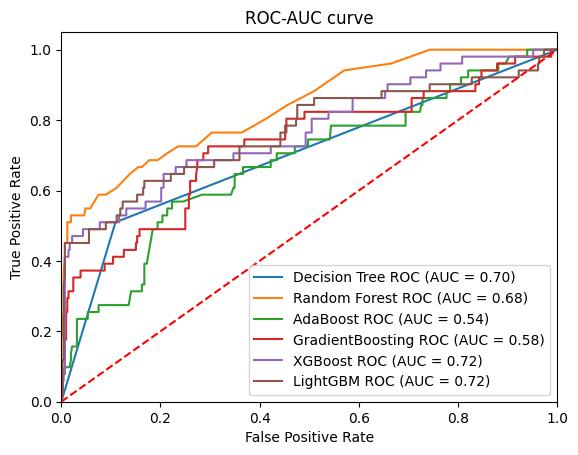

{'Decision Tree': {'accuracy': 0.8488120950323974,
  'precision': 0.8734353048249385,
  'recall': 0.8488120950323974,
  'f1_score': 0.859324099680051,
  'auc': 0.7002903102988768},
 'Random Forest': {'accuracy': 0.9265658747300216,
  'precision': 0.9250859672661224,
  'recall': 0.9265658747300216,
  'f1_score': 0.9125569251883737,
  'auc': 0.6838473253379022},
 'AdaBoost': {'accuracy': 0.8941684665226782,
  'precision': 0.8717667575653029,
  'recall': 0.8941684665226782,
  'f1_score': 0.8551330332432348,
  'auc': 0.5367885018084904},
 'GradientBoosting': {'accuracy': 0.9006479481641468,
  'precision': 0.8830547710029351,
  'recall': 0.9006479481641468,
  'f1_score': 0.8733427021893931,
  'auc': 0.5833809251856082},
 'XGBoost': {'accuracy': 0.9222462203023758,
  'precision': 0.913898501023144,
  'recall': 0.9222462203023758,
  'f1_score': 0.913685305360521,
  'auc': 0.7157814582143537},
 'LightGBM': {'accuracy': 0.9308855291576674,
  'precision': 0.926535051507806,
  'recall': 0.9308855

In [41]:
treinamento_vizualizacao_modelos(
    lista_modelos,
    X_train,
    X_test,
    y_train,
    y_test
)